<h1 align="center"><font size = 8>Machine Learning | 2024 </font></h1>
<br>
<h2 align="center"><font size = 6  color="darkblue"> Decision Tree </font></h2>
<h3 align="center">Abdulrahman Nourzad</h3>
<h4 align="center">Master's in Computer Software Engineering & Post DBA in Business Intelligence</h4>
<br>
<br>
<hr>

## Project 9: Decision Tree Classifier

**Decision trees :** 
- **Decision trees** are a popular and powerful tool used in various fields such as machine learning, data mining, and statistics. They provide a clear and intuitive way to make decisions based on data by modeling the relationships between different variables.

- A **decision tree** is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.


**Titanic dataset :**
- It is one of the most popular datasets used for understanding machine learning basics. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked.
- This dataset can be used to predict whether a given passenger survived or not. 

# 1. Import libraries

In [1]:
# pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# 2. Read data

In [3]:
df = pd.read_csv('Titanic.csv')

# 3. Exploratory data analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# The ' PassengerId ' column is ineffective in the prediction, so we can drop it:

df.drop(['PassengerId'], axis=1, inplace=True)

In [7]:
# We can drop ' Ticket ' column because it doesn't have any useful information.

df.drop('Ticket', axis=1, inplace=True)

In [8]:
df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


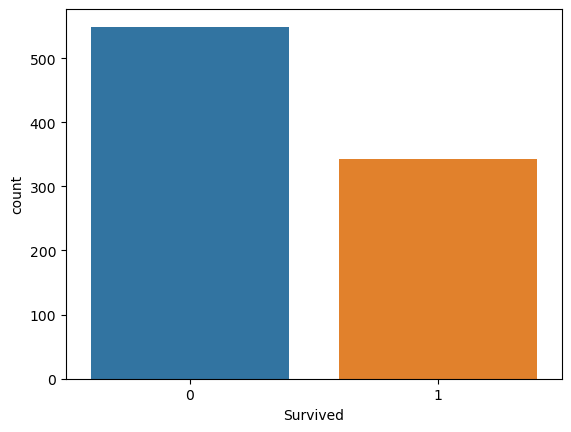

In [9]:
sns.countplot(data=df, x='Survived')
plt.show()

#### Result: The dataset is almost balance.

## Missing Values

In [10]:
df['Cabin'].apply(type)

0      <class 'float'>
1        <class 'str'>
2      <class 'float'>
3        <class 'str'>
4      <class 'float'>
            ...       
886    <class 'float'>
887      <class 'str'>
888    <class 'float'>
889      <class 'str'>
890    <class 'float'>
Name: Cabin, Length: 891, dtype: object

In [11]:
df['has_cabin'] = df['Cabin'].apply(lambda x: 0 if type(x)==float else 1)

In [12]:
df['has_cabin']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: has_cabin, Length: 891, dtype: int64

In [13]:
df.drop('Cabin', axis=1, inplace=True)

In [14]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [15]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,has_cabin,family_size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,1


In [17]:
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x==1 else 0)

In [18]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,has_cabin,family_size,is_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,1,1


In [19]:
df['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [20]:
df = df.dropna(subset=['Embarked'], axis=0)

In [21]:
df['Embarked'].isnull().sum() / len(df)

0.0

In [22]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [23]:
df['Age'].isnull().sum()

0

In [24]:
df['Age'] = df['Age'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Name         889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    int32  
 5   Fare         889 non-null    float64
 6   Embarked     889 non-null    object 
 7   has_cabin    889 non-null    int64  
 8   family_size  889 non-null    int64  
 9   is_alone     889 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 72.9+ KB


In [26]:
df.drop('Name', axis=1, inplace=True)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,has_cabin,family_size,is_alone
0,0,3,male,22,7.2500,S,0,2,0
1,1,1,female,38,71.2833,C,1,2,0
2,1,3,female,26,7.9250,S,0,1,1
3,1,1,female,35,53.1000,S,1,2,0
4,0,3,male,35,8.0500,S,0,1,1


# 4. determine  X, y

In [28]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# 5. train test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape

((711, 8), (178, 8))

# 6. Preprocessing

In [31]:
encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# 7. Decision Tree Classifier with criterion gini index

### Create

In [32]:
DT = DecisionTreeClassifier(random_state=42)

### Train

In [33]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Test

In [34]:
y_pred = DT.predict(X_test)

### feature importances

In [35]:
pd.DataFrame(DT.feature_importances_, index=X.columns, columns=["feature importances"])

,feature importances
Pclass,0.088629
Sex,0.295826
Age,0.235865
Fare,0.219658
Embarked,0.022463
has_cabin,0.040441
family_size,0.083007
is_alone,0.014111


### Visualize decision-tree

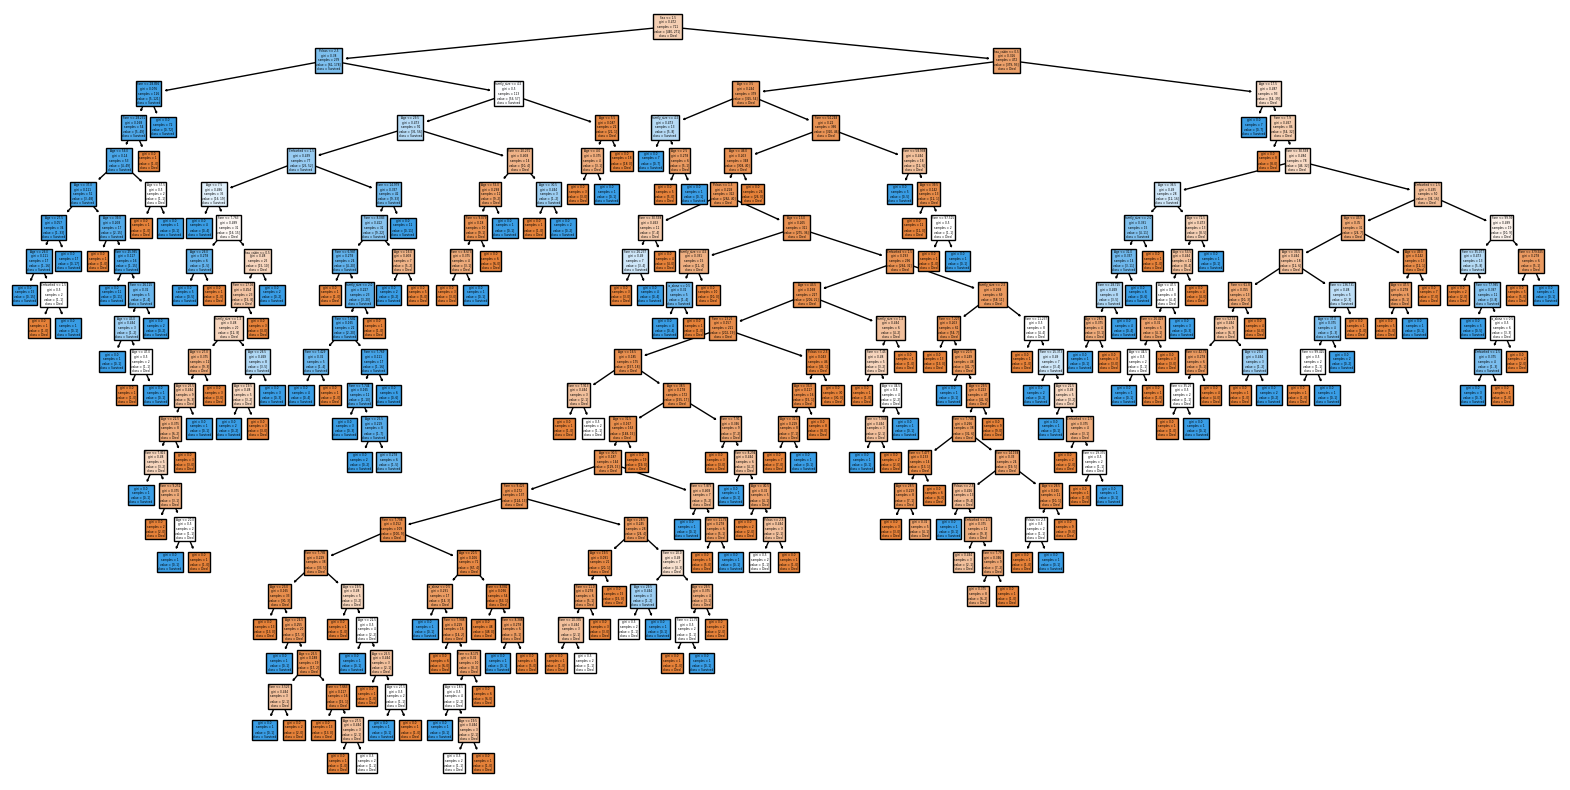

In [36]:
plt.figure(figsize=(20, 10))
plot_tree(DT, filled=True, feature_names=list(X.columns), class_names = ['Died', 'Survived']);

### Classification Report

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7415730337078652


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       109
           1       0.64      0.77      0.70        69

    accuracy                           0.74       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.74      0.74       178



# 8. Decision Tree Classifier with criterion entropy

### Create

In [39]:
entropy_DT = DecisionTreeClassifier(criterion='entropy', random_state=42)

### Train

In [40]:
entropy_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Test

In [41]:
y_pred_entropy = entropy_DT.predict(X_test)

In [42]:
y_pred_entropy_train = entropy_DT.predict(X_train)

### Visualize decision-trees

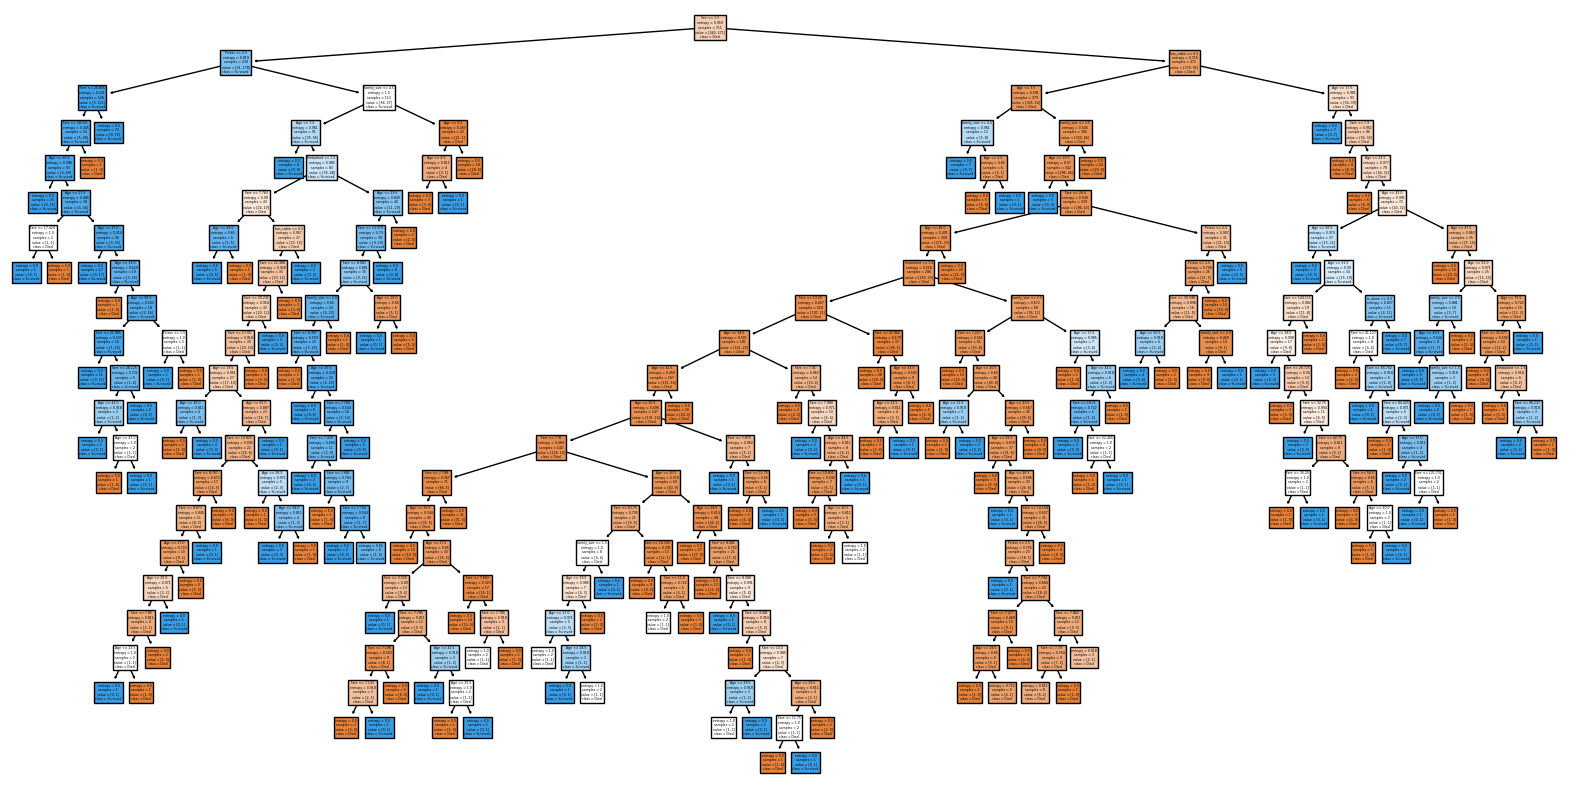

In [43]:
plt.figure(figsize=(20, 10))
plot_tree(entropy_DT, filled=True, feature_names=list(X.columns), class_names = ['Died', 'Survived']);

### Classification Report

In [44]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       109
           1       0.69      0.83      0.75        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



# 9. Pre-Pruning

### **Pre-Pruning :**
* This technique is used before construction of decision tree.
* Pre-Pruning can be done using Hyperparameter tuning.
* Overcome the overfitting issue.
* We can use GridSearchCV for Hyperparameter tuning.

In [45]:
DT_model = DecisionTreeClassifier(random_state=42)

In [46]:
grid_param = {"criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_depth":range(2,50,1),
              "min_samples_leaf":range(1,15,1),
              "min_samples_split":range(2,20,1)
              }

In [47]:
DT_grid_search = GridSearchCV(estimator=DT_model, param_grid=grid_param, cv=5, scoring='accuracy')
DT_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [48]:
print(DT_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 13, 'splitter': 'random'}


In [49]:
#DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
#                                 min_samples_split=2, splitter='random', random_state=42)

DT_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1,
                                 min_samples_split=13, splitter='random', random_state=42)

In [50]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=13, random_state=42,
                       splitter='random')

In [51]:
y_pred = DT_model.predict(X_test)

In [52]:
y_pred_train = DT_model.predict(X_train)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.77      0.72      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [54]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       440
           1       0.87      0.77      0.82       271

    accuracy                           0.87       711
   macro avg       0.87      0.85      0.86       711
weighted avg       0.87      0.87      0.87       711



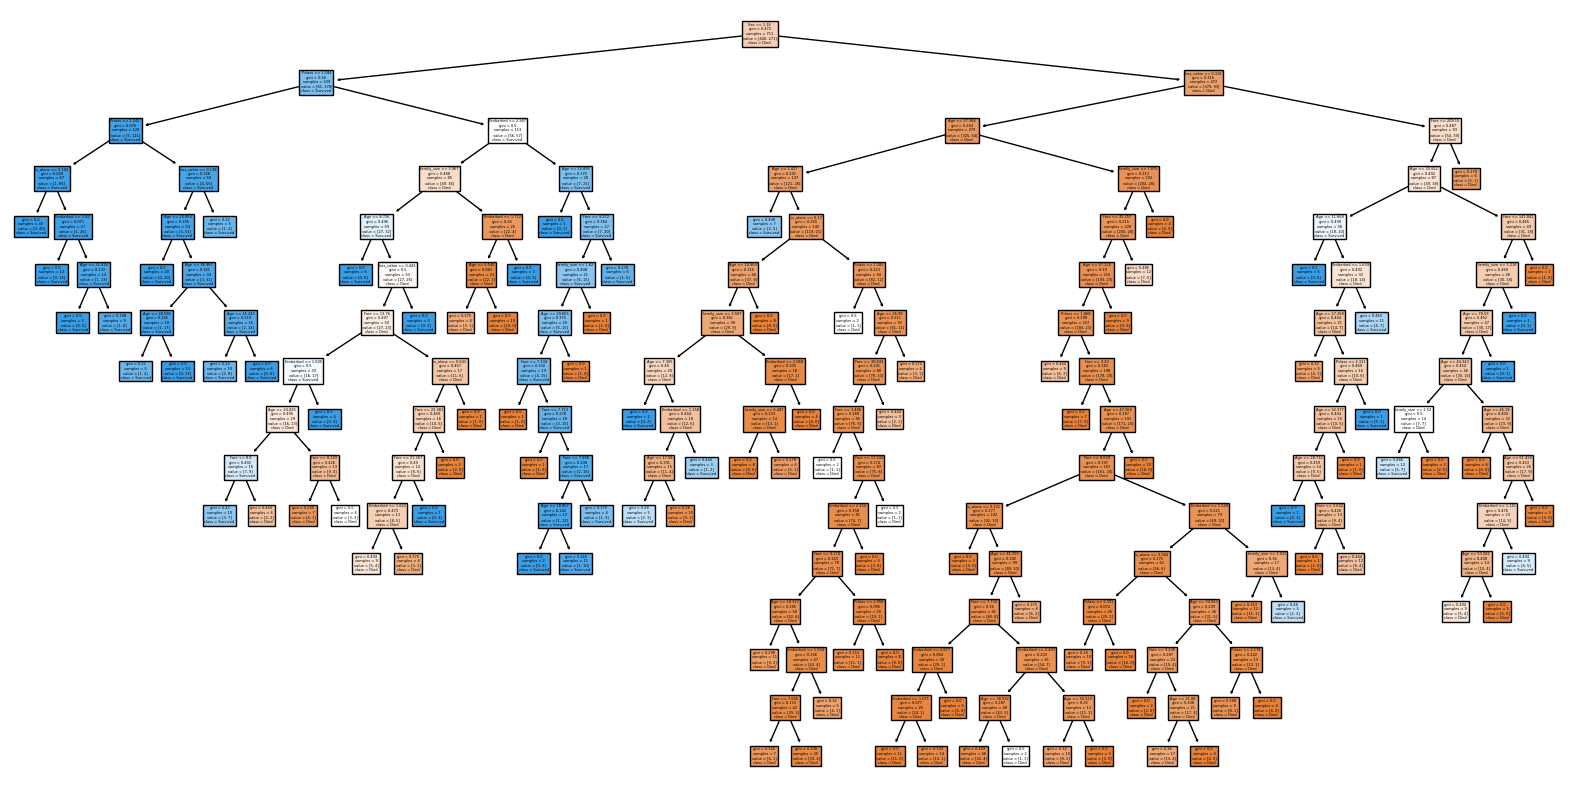

In [55]:
plt.figure(figsize=(20, 10))
plot_tree(DT_model, filled=True, feature_names=list(X.columns), class_names = ['Died', 'Survived']);

# 10. Post-Pruning

In [56]:
path = entropy_DT.cost_complexity_pruning_path(X_train, y_train)
#path = DT_model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("ccp alpha wil give list of values : \n", ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :\n", impurities)

ccp alpha wil give list of values : 
 [0.         0.00034474 0.00040857 0.00060109 0.00063063 0.00099393
 0.00106173 0.00106173 0.00150612 0.00169228 0.0017161  0.00180621
 0.00187075 0.00193733 0.00193733 0.0021703  0.00221185 0.00227602
 0.00228208 0.00242496 0.00251336 0.00257525 0.00281294 0.00293786
 0.00305803 0.00308217 0.00310179 0.00310946 0.00315099 0.00330312
 0.00330533 0.00335604 0.00345609 0.00347459 0.00350243 0.00380764
 0.00387467 0.00393352 0.00412717 0.00413706 0.00415367 0.00417131
 0.00421114 0.00424884 0.00427801 0.00438465 0.00439852 0.00477336
 0.00502743 0.00504556 0.00526059 0.00548542 0.00548542 0.00627903
 0.0064568  0.00651468 0.0067704  0.00703738 0.00743781 0.00804124
 0.00836479 0.00887718 0.01054187 0.01208993 0.01315375 0.01650212
 0.0276403  0.03208119 0.07385773 0.20810298]
***********************************************************
Impurities in Decision Tree :
 [0.04044288 0.04113237 0.04154094 0.04274312 0.04337376 0.04536162
 0.04642335 0.0474850

In [57]:
clfs = []

for ccp_alpha in ccp_alphas:

    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=ccp_alpha)
    #clf = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [58]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

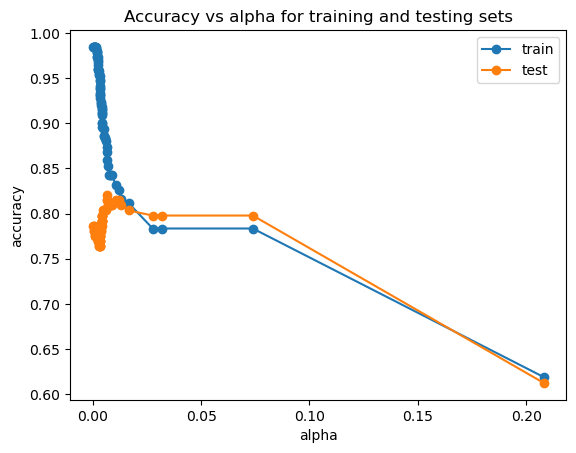

In [59]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

In [60]:
ccp_alphas

array([0.        , 0.00034474, 0.00040857, 0.00060109, 0.00063063,
       0.00099393, 0.00106173, 0.00106173, 0.00150612, 0.00169228,
       0.0017161 , 0.00180621, 0.00187075, 0.00193733, 0.00193733,
       0.0021703 , 0.00221185, 0.00227602, 0.00228208, 0.00242496,
       0.00251336, 0.00257525, 0.00281294, 0.00293786, 0.00305803,
       0.00308217, 0.00310179, 0.00310946, 0.00315099, 0.00330312,
       0.00330533, 0.00335604, 0.00345609, 0.00347459, 0.00350243,
       0.00380764, 0.00387467, 0.00393352, 0.00412717, 0.00413706,
       0.00415367, 0.00417131, 0.00421114, 0.00424884, 0.00427801,
       0.00438465, 0.00439852, 0.00477336, 0.00502743, 0.00504556,
       0.00526059, 0.00548542, 0.00548542, 0.00627903, 0.0064568 ,
       0.00651468, 0.0067704 , 0.00703738, 0.00743781, 0.00804124,
       0.00836479, 0.00887718, 0.01054187, 0.01208993, 0.01315375,
       0.01650212, 0.0276403 , 0.03208119, 0.07385773, 0.20810298])

In [61]:
idx = np.argmax(test_scores)

In [62]:
test_scores[idx]

0.8202247191011236

In [63]:
train_scores[idx]

0.8677918424753868

In [64]:
ccp_alpha = ccp_alphas[idx]
ccp_alpha

0.006514675732418217

In [65]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=ccp_alpha)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.006514675732418217, criterion='entropy',
                       random_state=42)

In [66]:
y_pred_clf = clf.predict(X_test)

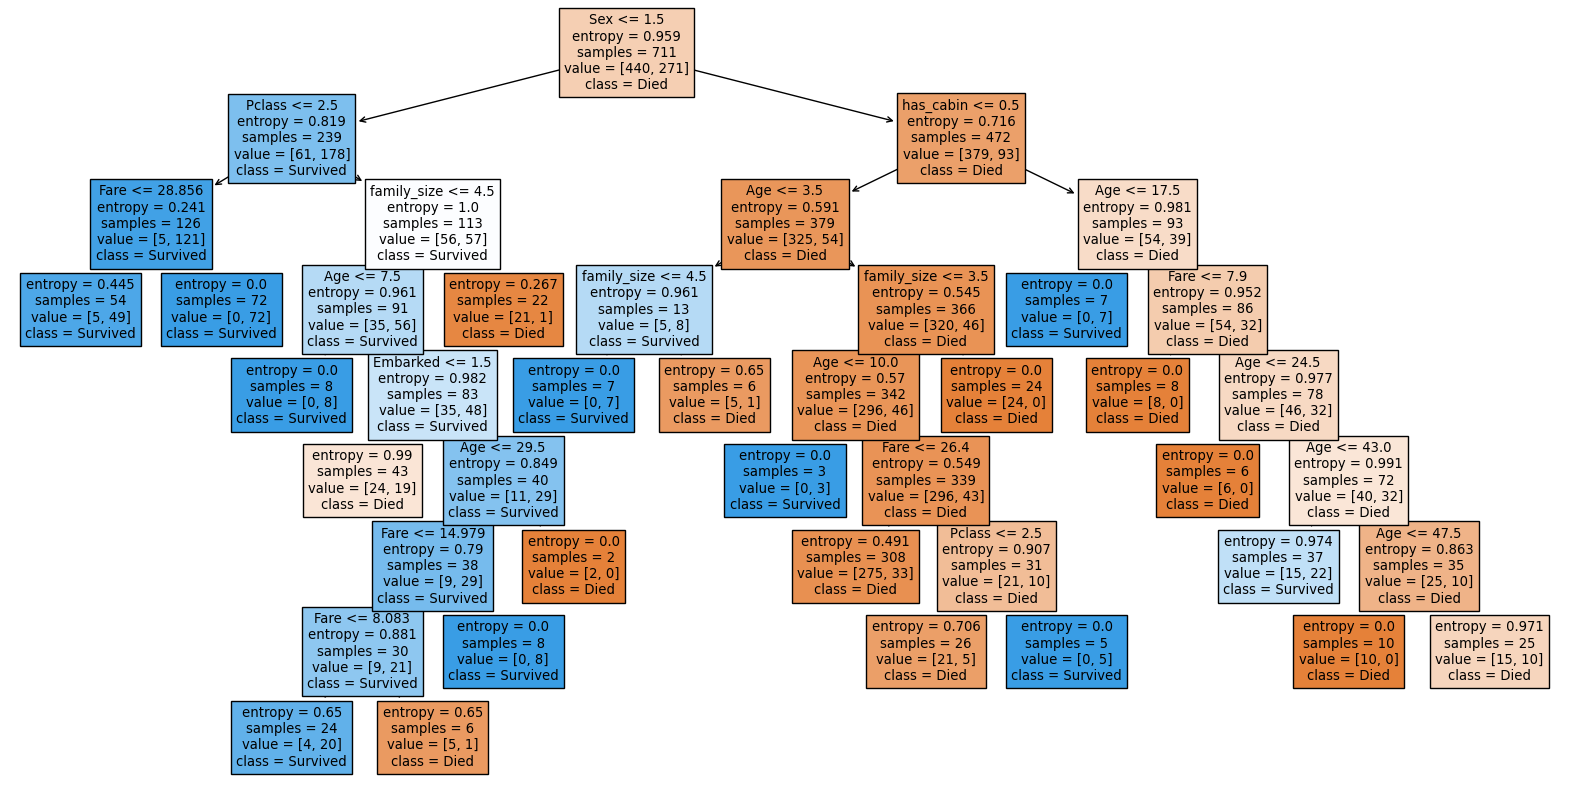

In [67]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names = ['Died', 'Survived']);

In [68]:
print(classification_report(y_test, clf.predict(X_test)))
#print(classification_report(y_test, entropy_DT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.78      0.74      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



### Well done! 
**Nourzad**